In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:\Users\navji\Downloads\CIS_4930_Heart_Disease_Dataset.csv')

In [81]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,18-24,157,54.43,21.95,No,20,12,12,4
1,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,18-24,163,77.11,29.18,No,5,16,12,16
2,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,18-24,163,58.97,22.31,No,10,60,12,16
3,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,170,53.52,18.48,No,8,60,4,0
4,Excellent,Within the past 2 years,Yes,No,No,No,Yes,No,No,Female,30-34,175,61.23,19.94,No,4,10,28,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262527,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
262528,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
262529,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
262530,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


In [36]:
########################
#data transformation (going to add this)
dummies = pd.get_dummies(df['Age_Category'])
dummies = dummies.astype(int)
df = pd.concat([df, dummies], axis = 1)
df = df.drop(columns=['Age_Category'])

In [37]:
######################## (gets rid of those extra columns)
df['General_Health'] = df['General_Health'].str.strip()

In [38]:
#data transformation (going to add this)
dummies = pd.get_dummies(df['General_Health'])
dummies = dummies.astype(int) #i added this because the way this version of python works makes the boolean work better, issues without this line
df = pd.concat([df, dummies], axis = 1)
df = df.drop(columns=['General_Health'])


In [40]:
#########################
df['Checkup'] = df['Checkup'].str.strip()

In [41]:
dummies = pd.get_dummies(df['Checkup'])
dummies = dummies.astype(int)
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['Checkup'])

In [45]:
#########################(OPTIONAL)
df = df.rename(columns={'Excellent': 'Excellent Health'})

In [49]:
######################## FEATURE ENGINEERING
'''When used with boolean values, the | operator evaluates to True if either of the operands is True.

For example:

True | False results in True.
False | False results in False.'''

df['40-49'] = df['40-44'] | df['45-49']
df['50-59'] = df['50-54'] | df['55-59']
df['60-69'] = df['60-64'] | df['65-69']
df['70-79'] = df['70-74'] | df['75-79']
df = df.drop(columns = ['40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79'], axis=1)
df

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),...,Very Good,5 or more years ago,Never,Within the past 2 years,Within the past 5 years,Within the past year,60-69,40-49,50-59,70-79
0,Yes,No,No,No,No,No,No,Female,157,54.43,...,1,0,0,0,0,1,0,0,0,0
1,Yes,No,No,No,No,Yes,No,Female,163,77.11,...,1,0,0,0,0,1,0,0,0,0
2,Yes,No,No,No,No,No,No,Female,163,58.97,...,1,0,0,0,0,1,0,0,0,0
3,Yes,No,No,No,No,No,No,Female,170,53.52,...,1,0,0,0,0,1,0,1,0,0
4,Yes,No,No,No,Yes,No,No,Female,175,61.23,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262527,Yes,No,No,No,No,No,No,Male,168,81.65,...,1,0,0,0,0,1,0,0,0,0
262528,Yes,No,No,No,No,Yes,No,Male,180,69.85,...,0,0,0,0,1,0,1,0,0,0
262529,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,157,61.23,...,1,1,0,0,0,0,0,0,0,0
262530,Yes,No,No,No,No,No,No,Male,183,79.38,...,1,0,0,0,0,1,1,0,0,0


In [3]:
df.columns
df.info()
df = df.dropna()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262532 entries, 0 to 262531
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                262532 non-null  object 
 1   Checkup                       262532 non-null  object 
 2   Exercise                      262532 non-null  object 
 3   Heart_Disease                 262532 non-null  object 
 4   Skin_Cancer                   262532 non-null  object 
 5   Other_Cancer                  262532 non-null  object 
 6   Depression                    262532 non-null  object 
 7   Diabetes                      262532 non-null  object 
 8   Arthritis                     262532 non-null  object 
 9   Sex                           262532 non-null  object 
 10  Age_Category                  262532 non-null  object 
 11  Height_(cm)                   262532 non-null  int64  
 12  Weight_(kg)                   262532 non-nul

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [4]:
df = df.drop(columns=['Age_Category'], axis =1)

In [5]:

df['Diabetes'] = np.where(df['Diabetes'] == 'No, pre-diabetes or borderline diabetes', 'No', df['Diabetes'])
df['Diabetes'] = np.where(df['Diabetes'] == 'Yes, but female told only during pregnancy', 'Yes', df['Diabetes'])


In [6]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,157,54.43,21.95,No,20,12,12,4
1,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,163,77.11,29.18,No,5,16,12,16
2,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,163,58.97,22.31,No,10,60,12,16
3,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,170,53.52,18.48,No,8,60,4,0
4,Excellent,Within the past 2 years,Yes,No,No,No,Yes,No,No,Female,175,61.23,19.94,No,4,10,28,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262527,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,168,81.65,29.05,No,4,30,8,0
262528,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,180,69.85,21.48,No,8,15,60,4
262529,Very Good,5 or more years ago,Yes,No,No,No,Yes,Yes,No,Female,157,61.23,24.69,Yes,4,40,8,4
262530,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,183,79.38,23.73,No,3,30,12,0


In [7]:
columns = ["Exercise", "Heart_Disease", "Skin_Cancer", "Other_Cancer", "Arthritis", "Depression", "Diabetes", "Smoking_History"]

for column in columns:
  df[column] = np.where(df[column] == "Yes", 1, 0)


In [8]:
columns = ["Sex"]

for column in columns:
    df[column] = np.where(df[column] == "Male", 1, 0) 


In [9]:
df = df.drop(columns=["Checkup"])

In [10]:
columns = ["General_Health"]

for column in columns:
    df[column] = np.where(df[column] == "High", 1, 0)


In [11]:
df

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,1,0,0,0,0,0,0,0,157,54.43,21.95,0,20,12,12,4
1,0,1,0,0,0,0,1,0,0,163,77.11,29.18,0,5,16,12,16
2,0,1,0,0,0,0,0,0,0,163,58.97,22.31,0,10,60,12,16
3,0,1,0,0,0,0,0,0,0,170,53.52,18.48,0,8,60,4,0
4,0,1,0,0,0,1,0,0,0,175,61.23,19.94,0,4,10,28,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262527,0,1,0,0,0,0,0,0,1,168,81.65,29.05,0,4,30,8,0
262528,0,1,0,0,0,0,1,0,1,180,69.85,21.48,0,8,15,60,4
262529,0,1,0,0,0,1,1,0,0,157,61.23,24.69,1,4,40,8,4
262530,0,1,0,0,0,0,0,0,1,183,79.38,23.73,0,3,30,12,0


Markdown

In [12]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Heart_Disease'], axis=1)
y = df['Heart_Disease']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
train = x_train.join(y_train)
train.info()
df['Exercise'] = df['Exercise'].astype(int)
df['Skin_Cancer'] = df['Skin_Cancer'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 210025 entries, 53981 to 37982
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                210025 non-null  int32  
 1   Exercise                      210025 non-null  int32  
 2   Skin_Cancer                   210025 non-null  int32  
 3   Other_Cancer                  210025 non-null  int32  
 4   Depression                    210025 non-null  int32  
 5   Diabetes                      210025 non-null  int32  
 6   Arthritis                     210025 non-null  int32  
 7   Sex                           210025 non-null  int32  
 8   Height_(cm)                   210025 non-null  int64  
 9   Weight_(kg)                   210025 non-null  float64
 10  BMI                           210025 non-null  float64
 11  Smoking_History               210025 non-null  int32  
 12  Alcohol_Consumption           210025 non-null 

array([[<Axes: title={'center': 'General_Health'}>,
        <Axes: title={'center': 'Exercise'}>,
        <Axes: title={'center': 'Skin_Cancer'}>,
        <Axes: title={'center': 'Other_Cancer'}>],
       [<Axes: title={'center': 'Depression'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Arthritis'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoking_History'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>,
        <Axes: title={'center': 'FriedPotato_Consumption'}>],
       [<Axes: title={'center': 'Heart_Disease'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

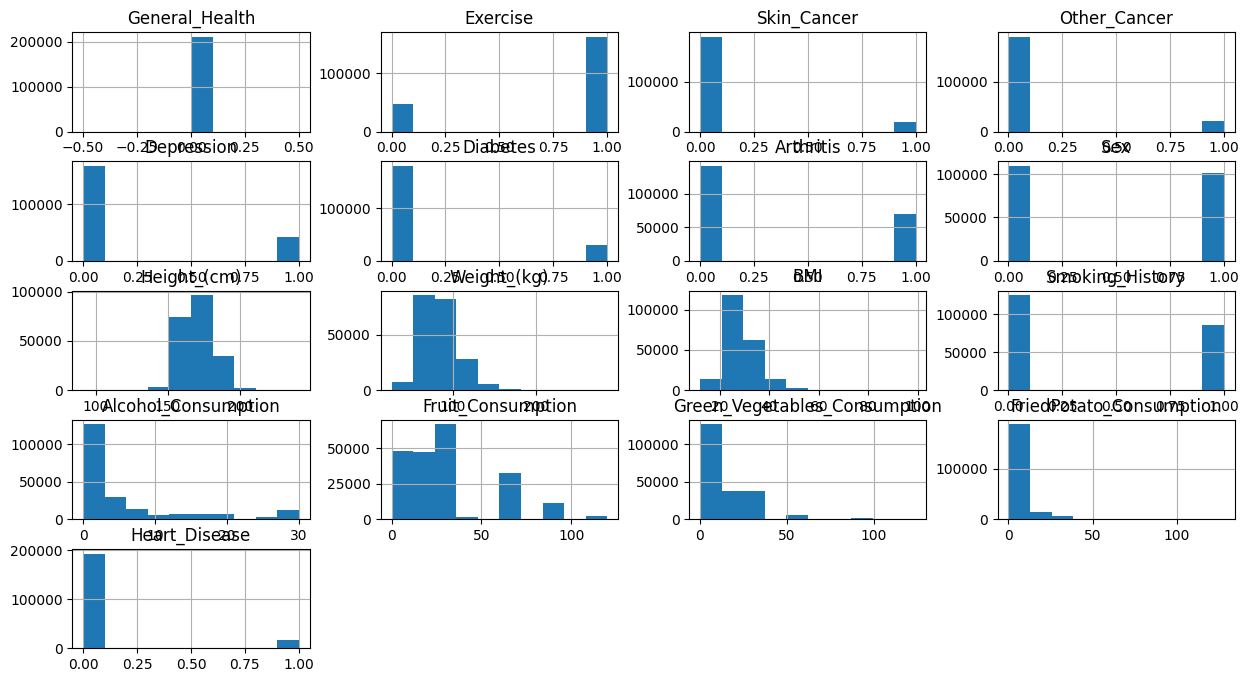

In [15]:
##########EXPLORATORY DATA ANALYSIS
train.hist(figsize=(15, 8))

<Axes: xlabel='BMI', ylabel='Sex'>

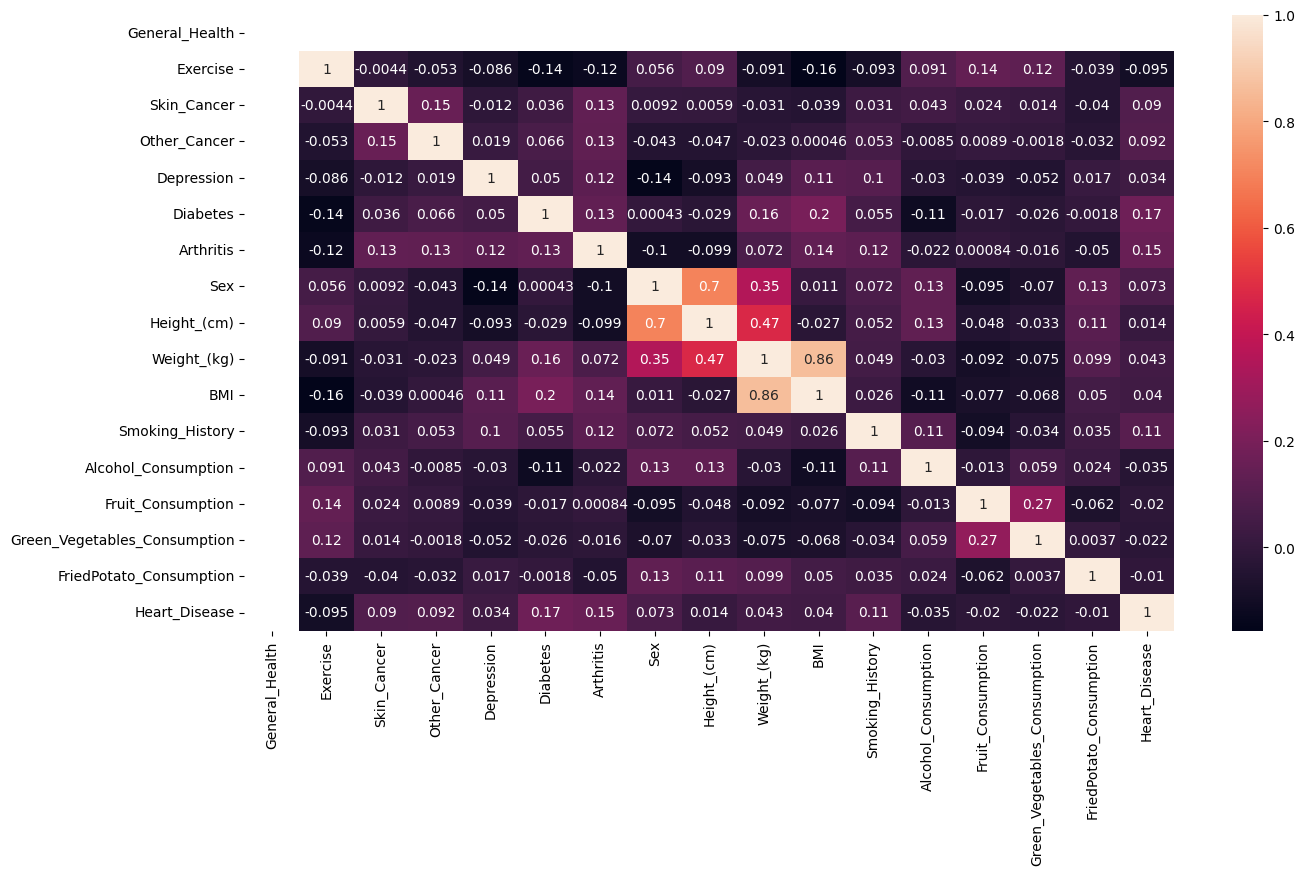

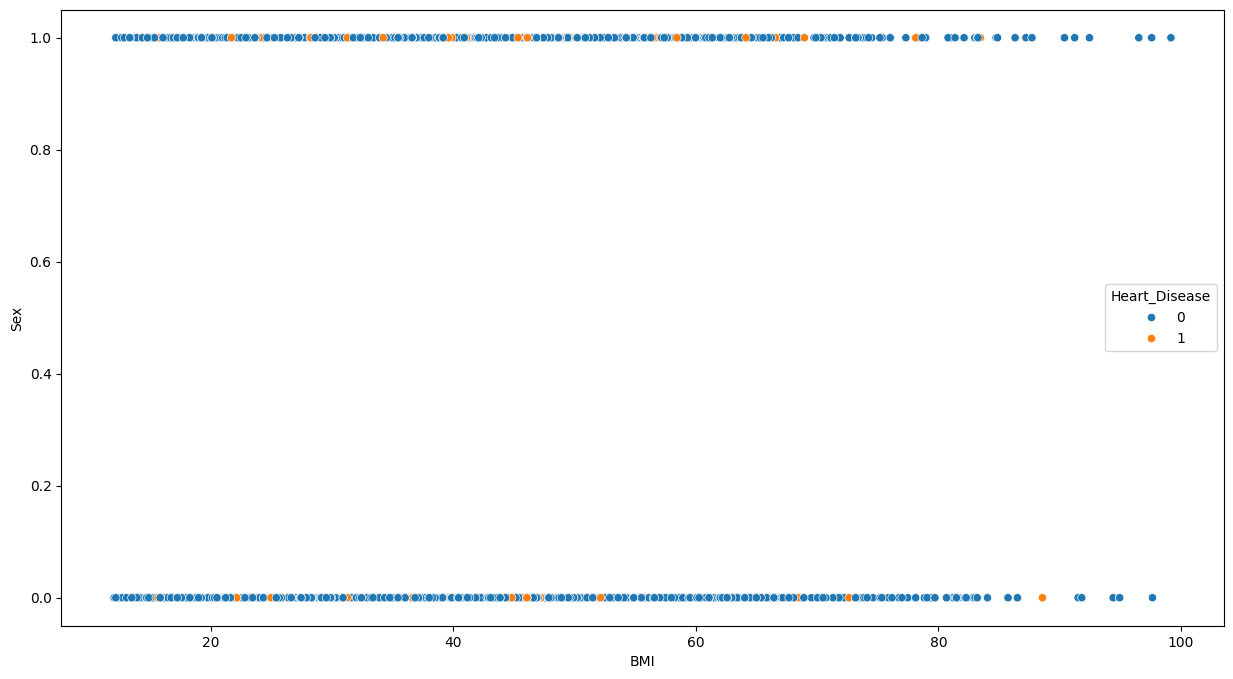

In [31]:
##########EXPLORATORY DATA ANALYSIS

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(), annot=True)


# SCATTERPLOT (FIND SOME EDA FOR BINARY CLASSIFICATION)
plt.figure(figsize=(15, 8))
sns.scatterplot(x="BMI", y="Sex", data=train, hue="Heart_Disease")



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train.drop(['Heart_Disease'], axis=1), train['Heart_Disease']
x_train_s = scaler.fit_transform(x_train)

model = LogisticRegression(solver="liblinear")

model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
test = x_test.join(y_test)
x_test, y_test = test.drop(['Heart_Disease'], axis=1), test['Heart_Disease']
#x_test_s = scaler.transform(x_test)


In [19]:
test

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
175365,0,1,0,0,0,0,0,1,191,81.65,22.50,0,20,90,28,3,0
15635,0,0,0,0,1,0,0,0,157,70.31,28.35,0,2,16,2,2,0
134621,0,1,1,0,0,0,1,0,160,56.25,21.97,0,4,60,20,1,0
191985,0,1,0,0,0,0,1,0,165,77.11,28.29,0,0,30,20,4,0
246649,0,1,1,0,0,1,1,0,165,77.11,28.29,0,0,30,12,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183926,0,0,0,1,0,0,1,0,147,52.16,24.03,1,0,30,15,3,0
1271,0,1,1,0,0,0,1,1,175,81.65,26.58,1,30,2,4,16,1
207408,0,1,0,0,0,0,0,0,173,79.38,26.61,1,16,60,30,0,0
53846,0,0,0,0,0,0,0,0,152,43.09,18.55,1,0,3,5,1,0


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred = model.predict(x_test)

conf = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)
print(conf)
print(accuracy)

#print(model.coef_)
#print(model.intercept_)


[[48056   103]
 [ 4254    94]]
0.9170205877311597
[[ 0.00000000e+00 -4.25616227e-01  5.54032166e-01  5.24930564e-01
   1.40625744e-01  1.03056647e+00  8.61471624e-01  9.95733691e-01
  -1.96990078e-02  1.65698422e-03 -1.27831009e-02  5.90045849e-01
  -1.59946087e-02  2.74367984e-04  2.61601756e-05 -8.20712496e-03]]
[-0.0054013]


In [ ]:
#WILL ADD THIS, ADD LOGISTIC CURVE AND AUROC